# 1. One-Way ANOVA F-test

In [15]:
import pandas as pd
import scipy.stats as stats

# Create a DataFrame with the given variables
data = {
    'Product_Category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Books', 'Clothing', 'Electronics', 'Clothing', 'Books'],
    'Purchase_Amount': [100, 150, 200, 120, 180, 140, 220, 160, 190],
    'Customer_Satisfaction': [4, 3, 5, 4, 5, 3, 4, 3, 5],
    'Shipping_Speed': [2, 3, 1, 2, 1, 3, 1, 2, 3]
}

df = pd.DataFrame(data)

# Null Hypothesis (H0): There is no significant difference in the mean purchase amounts across different product categories.
# Alternative Hypothesis (Ha): There is a significant difference in the mean purchase amounts across different product categories.


# Perform ANOVA F-test between each feature and the target variable
features = ['Product_Category', 'Customer_Satisfaction', 'Shipping_Speed']
target_variable = 'Purchase_Amount'
significant_features = []

alpha = 0.05  # Significance level

for feature in features:
    fvalue, pvalue = stats.f_oneway(df[target_variable][df[feature] == df[feature].unique()[0]],
                                    df[target_variable][df[feature] == df[feature].unique()[1]],
                                    df[target_variable][df[feature] == df[feature].unique()[2]])

    # Calculate the degrees of freedom
    num_groups = len(df[feature].unique())
    num_samples = len(df[target_variable])
    df_between = num_groups - 1
    df_within = num_samples - num_groups

    # Calculate the F critical value
    f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

    print("ANOVA F-test between", feature, "and", target_variable)
    print("F-value:", fvalue)
    print("p-value:", pvalue)
    print("F critical value:", f_critical)

    if pvalue < alpha:
        significant_features.append(feature)

print("\nSignificant features:", significant_features)


ANOVA F-test between Product_Category and Purchase_Amount
F-value: 1.2076923076923076
p-value: 0.36243642843721474
F critical value: 5.143252849784718
ANOVA F-test between Customer_Satisfaction and Purchase_Amount
F-value: 1.2076923076923076
p-value: 0.36243642843721474
F critical value: 5.143252849784718
ANOVA F-test between Shipping_Speed and Purchase_Amount
F-value: 5.967213114754097
p-value: 0.037444780593130375
F critical value: 5.143252849784718

Significant features: ['Shipping_Speed']


In [14]:
df

,Product_Category,Purchase_Amount,Customer_Satisfaction,Shipping_Speed
0,Electronics,100,4,2
1,Clothing,150,3,3
2,Books,200,5,1
3,Electronics,120,4,2
4,Books,180,5,1
5,Clothing,140,3,3
6,Electronics,220,4,1
7,Clothing,160,3,2
8,Books,190,5,3


In [16]:
print(df_between)

2


In [17]:
print(df_within)

6


# 2. Demystifying the One-Way ANOVA F-test : Opening the Black Box to Understand the Testing Process.

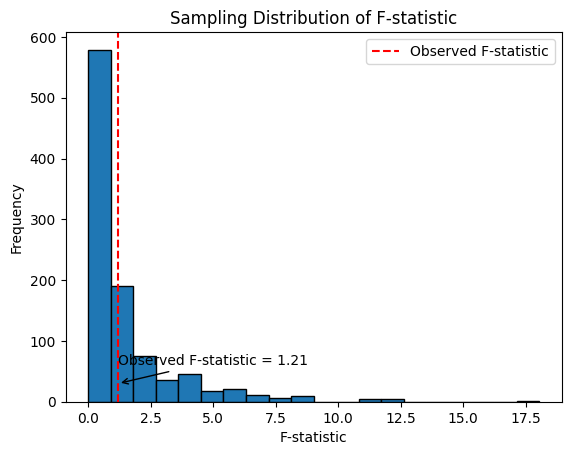

Observed F-statistic: 1.2076923076923076
p-value: 0.358


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with increased sample size
data = {
    'Product_Category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Books', 'Clothing', 'Electronics', 'Clothing', 'Books'],
    'Purchase_Amount': [100, 150, 200, 120, 180, 140, 220, 160, 190],
    'Customer_Satisfaction': [4, 3, 5, 4, 5, 3, 4, 3, 5],
    'Shipping_Speed': [2, 3, 1, 2, 1, 3, 1, 2, 3]
}

df = pd.DataFrame(data)

# Define the observed F-statistic
observed_fvalue, _ = stats.f_oneway(df['Purchase_Amount'][df['Product_Category'] == 'Electronics'],
                                    df['Purchase_Amount'][df['Product_Category'] == 'Clothing'],
                                    df['Purchase_Amount'][df['Product_Category'] == 'Books'])

# Set the random seed for reproducibility
np.random.seed(0)

# Number of permutations for sampling distribution
n_permutations = 1000

# Initialize the array to store F-statistics
f_statistics = np.zeros(n_permutations)

# Perform permutation and calculate F-statistics
for i in range(n_permutations):
    permuted_labels = np.random.permutation(df['Product_Category'])
    permuted_fvalue, _ = stats.f_oneway(df['Purchase_Amount'][permuted_labels == 'Electronics'],
                                        df['Purchase_Amount'][permuted_labels == 'Clothing'],
                                        df['Purchase_Amount'][permuted_labels == 'Books'])
    
    
    f_statistics[i] = permuted_fvalue

# Plot the sampling distribution
plt.hist(f_statistics, bins=20, edgecolor='black')
plt.axvline(observed_fvalue, color='red', linestyle='--', label='Observed F-statistic')
plt.xlabel('F-statistic')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of F-statistic')
plt.legend()
plt.annotate(f'Observed F-statistic = {observed_fvalue:.2f}', xy=(observed_fvalue, 30), xytext=(observed_fvalue, 60),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.show()

# Calculate the p-value
p_value = (f_statistics >= observed_fvalue).sum() / n_permutations

print('Observed F-statistic:', observed_fvalue)
print('p-value:', p_value)


In [18]:
df

,Product_Category,Purchase_Amount,Customer_Satisfaction,Shipping_Speed
0,Electronics,100,4,2
1,Clothing,150,3,3
2,Books,200,5,1
3,Electronics,120,4,2
4,Books,180,5,1
5,Clothing,140,3,3
6,Electronics,220,4,1
7,Clothing,160,3,2
8,Books,190,5,3


In [19]:
observed_fvalue

1.2076923076923076

In [5]:
import pandas as pd
df = pd.read_csv("./Housepricedata.csv")


In [40]:
# Create the dataframe
data = {
    'Sale Price': [200000, 300000, 250000, 400000, 350000],
    'Bedrooms': [3, 4, 3, 5, 4],
    'Square Footage': [2000, 2500, 2200, 3000, 2800],
    'Location': ['Urban', 'Rural', 'Urban', 'Urban', 'Rural'],
    'Age of House': [10, 5, 8, 12, 6],
    'Bathrooms': [2, 3, 2, 4, 3]
}

df = pd.DataFrame(data)

In [38]:
df

,Bedrooms,Square Footage,Location,Age of House,Bathrooms,Sale Price
0,5,3213,Rural,34,3,117023
1,1,3229,Suburb,25,3,911224
2,4,3785,Suburb,4,2,257700
3,4,3604,Suburb,26,2,830472
4,4,3010,City,18,1,718277
...,...,...,...,...,...,...
9995,1,2940,City,7,2,78053
9996,5,1664,Rural,46,2,221726
9997,5,1347,Rural,19,3,402710
9998,4,1070,Rural,25,2,239290


# 2. Multiple Feature selection using Regression F-test or overall F-test

In [45]:
import pandas as pd
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression



# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Get all combinations of independent variables
independent_vars = list(df_encoded.columns[1:])
combinations_list = []
for r in range(1, len(independent_vars) + 1):
    combinations_list.extend(combinations(independent_vars, r))

# Perform regression F-test for each combination
significant_combinations = []
for combo in combinations_list:
    X = df_encoded[list(combo)]
    y = df_encoded['Sale Price']
    print(combo)

    model = LinearRegression()
    model.fit(X, y)

    f_values, p_values = f_regression(X, y)
    print("[f_values, p_values]", f_values, p_values)

    if all(p_value < 0.05 for p_value in p_values):
        significant_combinations.append((combo, f_values, p_values))
print("_________________________________________________________________")
# Print the significant combinations with F-values and p-values
print("Print the significant combinations with F-values and p-values")
print()
for i, (combo, f_values, p_values) in enumerate(significant_combinations, start=1):
    print(f"Combination {i}: {list(combo)}")
    print(f"   F-values: {f_values}")
    print(f"   p-values: {p_values}")
    print()


('Bedrooms',)
[f_values, p_values] [25.] [0.01539244]
('Square Footage',)
[f_values, p_values] [507.] [0.00019182]
('Age of House',)
[f_values, p_values] [0.03703704] [0.85968052]
('Bathrooms',)
[f_values, p_values] [25.] [0.01539244]
('Location_Urban',)
[f_values, p_values] [0.27272727] [0.63761809]
('Bedrooms', 'Square Footage')
[f_values, p_values] [ 25. 507.] [0.01539244 0.00019182]
('Bedrooms', 'Age of House')
[f_values, p_values] [25.          0.03703704] [0.01539244 0.85968052]
('Bedrooms', 'Bathrooms')
[f_values, p_values] [25. 25.] [0.01539244 0.01539244]
('Bedrooms', 'Location_Urban')
[f_values, p_values] [25.          0.27272727] [0.01539244 0.63761809]
('Square Footage', 'Age of House')
[f_values, p_values] [5.0700000e+02 3.7037037e-02] [1.91815469e-04 8.59680523e-01]
('Square Footage', 'Bathrooms')
[f_values, p_values] [507.  25.] [0.00019182 0.01539244]
('Square Footage', 'Location_Urban')
[f_values, p_values] [5.07000000e+02 2.72727273e-01] [1.91815469e-04 6.37618091e-01

In [70]:
import pandas as pd

data = {
'Total_Distance_km': [319.44, 339.66, 346.57, 200.3, 200.68, 198.06, 366.63, 308.63, 296.09, 300.99,
291.39, 285.57, 286.53, 288.73, 302.9, 284.13, 301.42, 284.25, 131.57, 302,
283.5, 280.55, 321.98, 282.8, 307.08, 286.7, 334.32, 301.45, 283.87, 252.41,
338.22, 360.61, 351.99, 353.68, 364.44, 334.38, 592.98, 575.79, 586.46, 561.39,
595.37, 550.94, 567.43, 572.08],
'Total_Fuel_l': [425.25, 444.32, 444.42, 318.52, 278.55, 281.75, 407.52, 367.63, 348.04, 356.65,
322.23, 344.48, 347.31, 357.68, 351.07, 302.82, 361.31, 348.1, 155.2, 366.74,
339.85, 314, 359.88, 330.4, 342.11, 323.85, 368.02, 359.85, 336.05, 275.15,
385.04, 404.5, 381.01, 391.18, 368.5, 389.75, 492.13, 485.33, 483.42, 469.71,
496.1, 470.61, 473.14, 471.57],
'Average_Fuel_l_per_100_km': [133.12, 130.81, 128.23, 159.02, 138.8, 142.25, 111.15, 119.12, 117.55, 118.49,
110.58, 120.63, 121.21, 123.88, 115.9, 106.58, 119.87, 122.46, 117.96, 121.44,
119.88, 111.92, 111.77, 116.83, 111.41, 112.96, 110.08, 119.37, 118.38, 109.01,
113.84, 112.17, 108.24, 110.6, 101.11, 116.56, 82.99, 84.29, 82.43, 83.67,
83.33, 85.42, 83.38, 82.43],
'Average_Speed_Driving_km_per_h': [23.07, 22.87, 23.85, 15.32, 17.65, 18.41, 24.82, 22.56, 23.09, 22.44,
24.12, 22.13, 22.39, 24.06, 22.53, 21.54, 23.03, 21.9, 22.97, 23.64,
23.47, 22.99, 22.95, 22.66, 23.49, 22.79, 24.19, 24.75, 23.46, 24.43,
24.47, 23.93, 24.02, 24.32, 25.59, 22.5, 34.28, 32.73, 32.76, 32.59,
33.31, 32.37, 33.14, 33.59],
'Average_Brake_Counter_amount_per_100km': [435, 498, 441, 579, 652, 583, 461, 481, 602, 591,
474, 516, 615, 387, 539, 434, 463, 509, 596, 520,
504, 448, 449, 449, 633, 441, 418, 594, 540, 328,
411, 392, 359, 537, 437, 353, 232, 248, 193, 256,
234, 229, 147, 191]}

df = pd.DataFrame(data)

In [98]:
df

,Total_Distance_km,Total_Fuel_l,Average_Fuel_l_per_100_km,Average_Speed_Driving_km_per_h,Average_Brake_Counter_amount_per_100km
0,319.44,425.25,133.12,23.07,435
1,339.66,444.32,130.81,22.87,498
2,346.57,444.42,128.23,23.85,441
3,200.30,318.52,159.02,15.32,579
4,200.68,278.55,138.80,17.65,652
5,198.06,281.75,142.25,18.41,583
6,366.63,407.52,111.15,24.82,461
7,308.63,367.63,119.12,22.56,481
8,296.09,348.04,117.55,23.09,602
9,300.99,356.65,118.49,22.44,591


In [99]:
df.columns

Index(['Total_Distance_km', 'Total_Fuel_l', 'Average_Fuel_l_per_100_km',
       'Average_Speed_Driving_km_per_h',
       'Average_Brake_Counter_amount_per_100km'],
      dtype='object')

# Regression F- test to check overal significance of the regression estimate

### manual formulas with out libraries for f-values

In [104]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create the target variable and predictors
X = df[['Total_Distance_km', 'Total_Fuel_l', 'Average_Speed_Driving_km_per_h', 'Average_Brake_Counter_amount_per_100km']]
y = df['Average_Fuel_l_per_100_km']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
print("coeff: ", model.coef_)
print("intercept: ", model.intercept_)

# Calculate the total sum of squares (TSS)
y_mean = np.mean(y)
tss = np.sum((y - y_mean) ** 2)

# Calculate the residual sum of squares (RSS)
y_pred = model.predict(X)
rss = np.sum((y - y_pred) ** 2)

# Calculate the explained sum of squares (ESS)
ess = tss - rss

# Calculate the degrees of freedom
n = len(y)  # 44
k = X.shape[1]  # 4
df1 = k - 1  # Degrees of freedom for numerator 3 
df2 = n - k  # Degrees of freedom for denominator 40

# Calculate the F statistic
f_value = (ess / df1) / (rss / df2)

# Calculate the R-squared value
r_squared = ess / tss

# Calculate the critical F value at chosen level of significance (e.g., alpha = 0.05)
from scipy.stats import f

alpha = 0.05
critical_value = f.ppf(1 - alpha, df1, df2)

# Check if the F statistic is statistically significant
is_significant = f_value > critical_value
# with p-value , if p_value < 0.05

# Print the results
print("F statistic:", f_value)
print("R-squared:", r_squared)
print("Critical F value:", critical_value)
print("Is statistically significant:", is_significant)


coeff:  [-0.13781074  0.16329611 -2.00312244  0.00418579]
intercept:  147.0031122095718
F statistic: 153.88397852103478
R-squared: 0.9202634393205321
Critical F value: 2.8387453980206443
Is statistically significant: True


In [ ]:
# estimate regression
Average_Fuel_l_per_100_km = -0.13781074*Total_Distance_km + 0.16329611*Total_Fuel_l - 0.16329611* Average_Speed_Driving_km_per_h + 0.00418579*Average_Brake_Counter_amount_per_100km + Average_Brake_Counter_amount_per_100km

y = a1x1 + a2x2 + a3x3 + a4x4 + c

# test the overall significane of estimate regression using regression F-test

In [ ]:
interpreting results: it suggests that at least one of the predictors has a statistically significant impact o th e Average Fule l/100km

# Regression F- test to check overal significance of the regression estimate

### using libraries to calculate f_values

In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import scipy.stats as stats
from scipy.stats import f

# Create the target variable and predictors
X = df[['Total_Distance_km', 'Total_Fuel_l', 'Average_Speed_Driving_km_per_h', 'Average_Brake_Counter_amount_per_100km']]
y = df['Average_Fuel_l_per_100_km']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Perform the F-test using library function
f_values, p_values = f_regression(X, y)

# Calculate the degrees of freedom
n = len(y)
k = X.shape[1]
df1 = k - 1  # Degrees of freedom for numerator
df2 = n - k  # Degrees of freedom for denominator

# Calculate the critical F value at chosen level of significance (e.g., alpha = 0.05)
critical_value = stats.f.ppf(0.95, df1, df2)

# Check if each F value is statistically significant
is_significant = p_values < 0.05

# Check overall significance of the regression model
# Calculate the overall F-statistic
overall_f_value = np.mean(f_values)
p_value = stats.f.sf(overall_f_value, df1, df2)

# Print the results
print("F-values:", f_values)
print("p-values:", p_values)
print("Degrees of freedom (numerator):", df1)
print("Degrees of freedom (denominator):", df2)
print("Critical F value:", critical_value)
print("_____________________________________________________________")
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print("`````````````````````````````````````````````````````````````")
# Print the significant features
print("Significant Features:")
for feature in feature_names:
    print("-", feature)
print("_____________________________________________________________")
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
print("`````````````````````````````````````````````````````````````")
# Perform the overall significance test
print("Overall regression significance (F-statistic):", overall_f_value)
print("critical value: ", critical_value)
is_overall_significant = overall_f_value > critical_value
print("Overall regression p-value:", p_value)

print("Is the regression model overall significant:", is_overall_significant)


F-values: [123.49540753  25.62863875 278.83699157  75.65832775]
p-values: [4.38259133e-14 8.68924351e-06 3.74097415e-20 6.07363182e-11]
Degrees of freedom (numerator): 3
Degrees of freedom (denominator): 40
Critical F value: 2.8387453980206443
_____________________________________________________________
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
`````````````````````````````````````````````````````````````
Significant Features:
- Total_Distance_km
- Total_Fuel_l
- Average_Speed_Driving_km_per_h
- Average_Brake_Counter_amount_per_100km
_____________________________________________________________
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
`````````````````````````````````````````````````````````````
Overall regression significance (F-statistic): 125.90484139985105
critical value:  2.8387453980206443
Overall regression p-value: 2.0597820787856187e-20
Is the regression model overall significant: True
